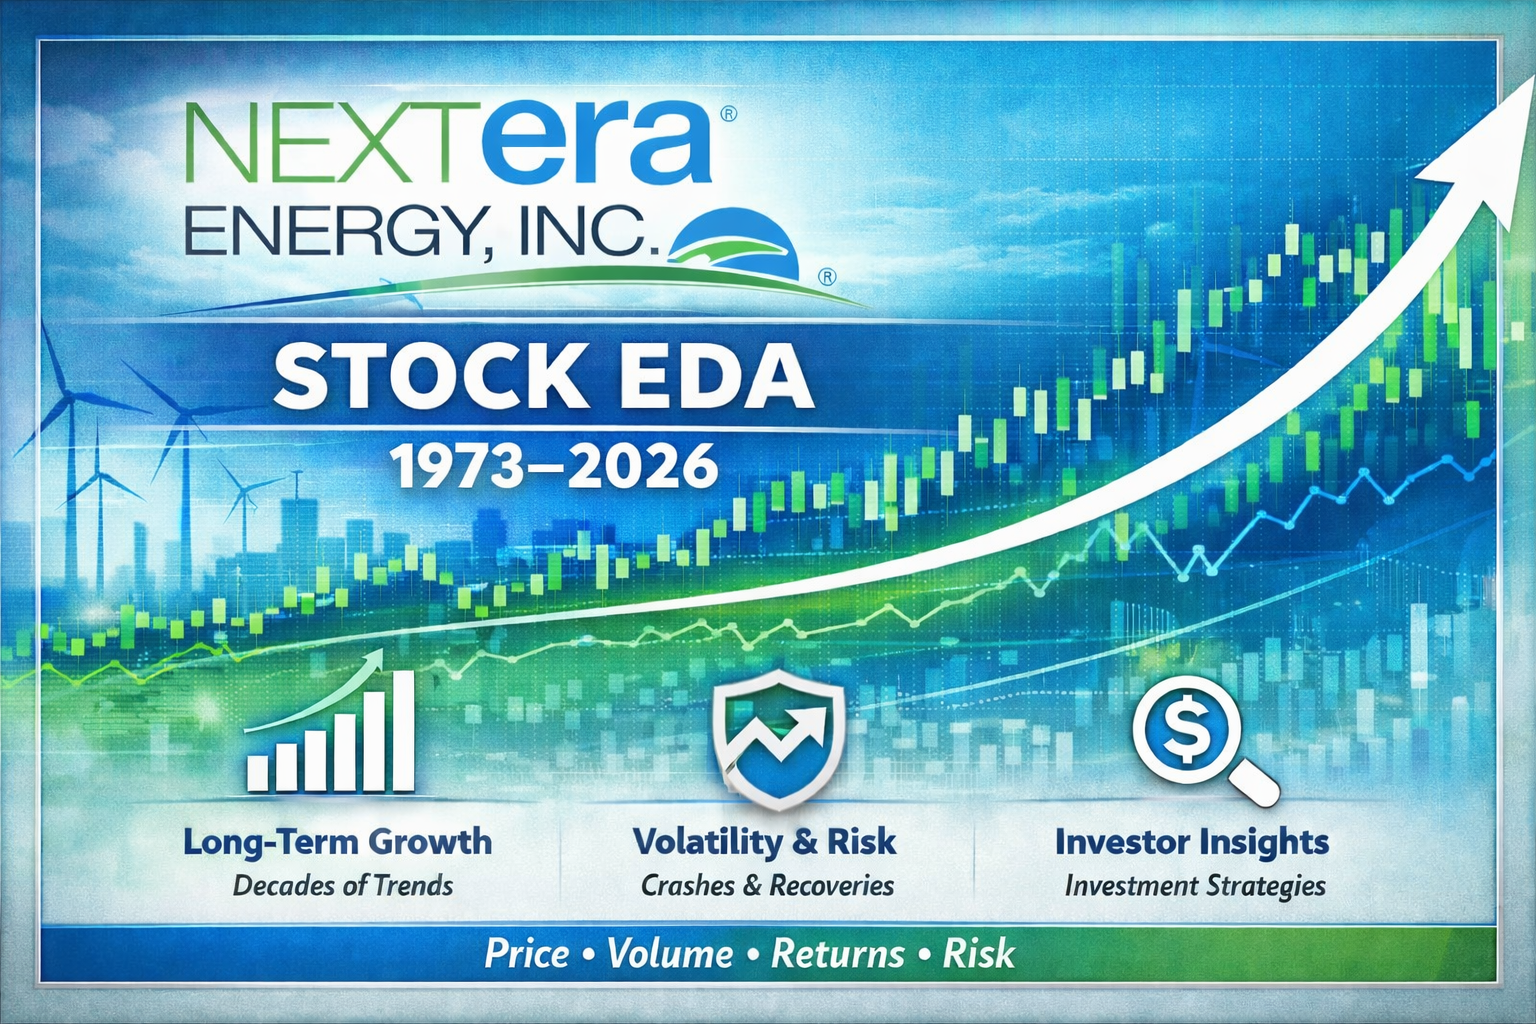

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/nextera-thumbnail/nextera_thumbnail.png'))

# **🚗 NextEra Energy Stock Analysis (1973 – 2026**)

Welcome to a **comprehensive exploratory data analysis (EDA)** of **NextEra Energy Motor Corporation’s stock** over the past 50+ years.  
This notebook combines **finance best practices, statistical analysis, and visual storytelling** to understand how NextEra Energy has evolved from a low-price stock to a mature large-cap equity.  

---

## **🔎 Purpose of This Analysis**

- 📊 **Understand price trends**: Long-term growth, bull/bear cycles, and structural breaks  
- 📉 **Daily price behavior**: OHLC analysis and intraday volatility  
- 🔄 **Risk & volatility assessment**: Rolling volatilities, crisis periods, and market stress  
- 📦 **Volume dynamics**: Institutional participation, panic trading, and price-volume relationship  
- 🔗 **Feature relationships**: Correlation between price, volume, and volatility  
- 📆 **Time-based patterns**: Yearly returns, decade-wise trends, and golden eras  
- ⚠️ **Extreme events**: Single-day gains/losses, crashes, and sudden rallies  
- 🎯 **Investment-focused insights**: Long-term vs short-term behavior, risk-return trade-offs, and portfolio suitability  

---

## **🌟 Why This Notebook is Valuable**

- Provides **actionable insights for investors** and finance enthusiasts  
- Uses **professional-grade visuals** with a consistent **Red & White theme**  
- Demonstrates **NextEra Energy’s resilience and market behavior** under normal and extreme conditions  
- Serves as a **reference for Kaggle, research projects, or portfolio analysis**

---

## **🛠️ Data Overview**

- **Period Covered:** 1973 - 2026  
- **Frequency:** Daily trading data  
- **Columns:** `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`  
- **Data Quality:** Complete, no missing values, and reliable for long-term analysis  

---

## **⚡ Notebook Highlights**

- ✅ Long-term growth and cyclical trends  
- ✅ Daily volatility and risk patterns  
- ✅ Volume spikes and investor behavior  
- ✅ Correlation, time-based patterns, and extreme events  
- ✅ Investment suitability and key takeaways  

---

> 🚀 **Goal:** Provide a complete, investor-friendly understanding of NextEra Energy’s stock, combining **data science, finance, and visualization** to uncover both historical trends and actionable insights.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
# NextEra Energy Brand Palette
nee_green = "#78C239"
nee_blue = "#0097DA"
nee_dark_blue = "#007DB6"

# Apply the NextEra Clean Energy Theme
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--'})
sns.set_palette([nee_green, nee_blue, nee_dark_blue])

# Set figure and axes background to white
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Optional: Set the font color to a professional dark grey
plt.rcParams["text.color"] = "#333333"
plt.rcParams["axes.labelcolor"] = "#333333"

In [4]:
df = pd.read_csv("/kaggle/input/nextera-energy-inc-stocks-data-1973-2026/NEXTera_stocks_data_1973_2026.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13339 entries, 0 to 13338
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        13339 non-null  object 
 1   Adj_Close   13339 non-null  float64
 2   Close       13339 non-null  float64
 3   High        13339 non-null  float64
 4   Low         13339 non-null  float64
 5   Open        13339 non-null  float64
 6   Volume      13339 non-null  int64  
 7   Unnamed: 7  1 non-null      object 
dtypes: float64(5), int64(1), object(2)
memory usage: 833.8+ KB


# **📌 1. Data Quality & Structure Insights**

### **📌 1.1 Date Continuity Check (Missing Trading Days & Gaps)**
**🔍 Insight**

- Detect missing trading days
- Identify long gaps caused by holidays or data issues
- Ensures time-series reliability

**📊 Plot: Gaps Between Consecutive Dates**

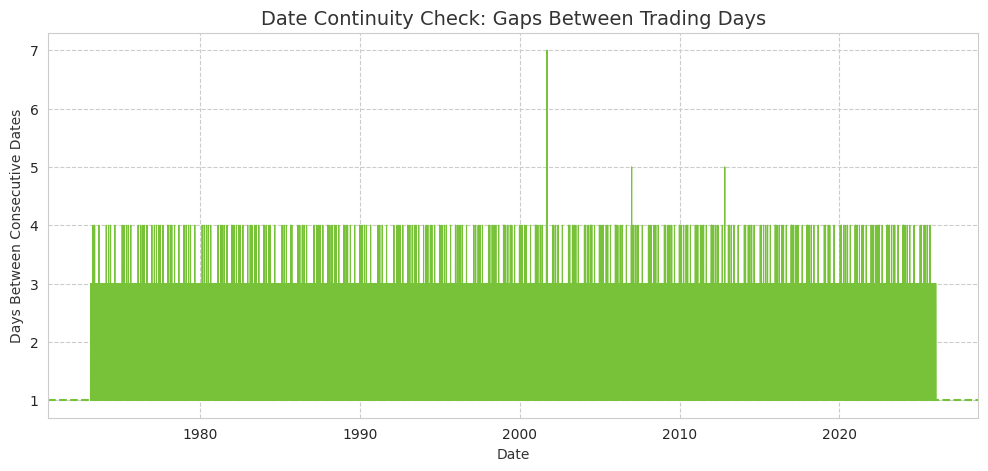

In [6]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate gaps between dates
date_diff = df['Date'].diff().dt.days

plt.figure(figsize=(12,5))
plt.plot(df['Date'], date_diff, linewidth=0.8)
plt.axhline(1, linestyle='--')
plt.title("Date Continuity Check: Gaps Between Trading Days", fontsize=14)
plt.ylabel("Days Between Consecutive Dates")
plt.xlabel("Date")
plt.show()

### **📌 1.2 Missing Values Check**
**🔍 Insight**

- Confirms dataset completeness
- Builds trust before financial analysis

**📊 Plot: Missing Values Bar Chart**

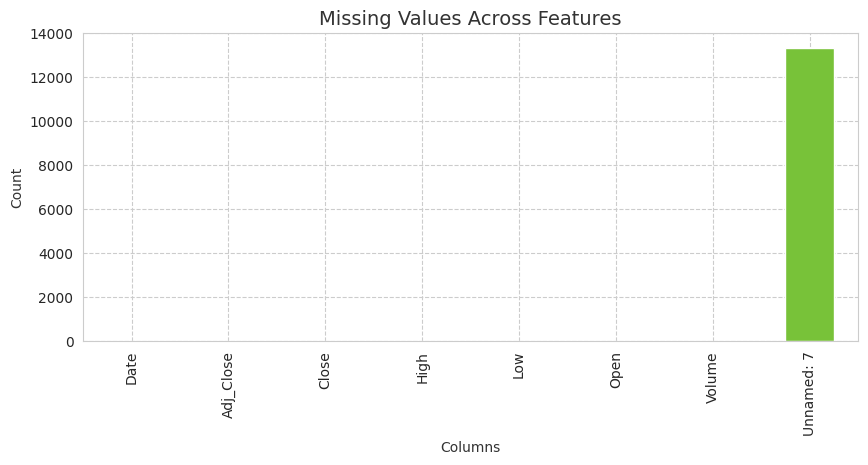

In [7]:
missing = df.isnull().sum()

plt.figure(figsize=(10,4))
missing.plot(kind='bar')
plt.title("Missing Values Across Features", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Columns")
plt.show()

### **📌 1.3 Data Type Verification**
**🔍 Insight**

- Ensures numerical columns are ready for analysis
- Confirms Date is correctly parsed

**📊 Plot: Data Type Distribution**

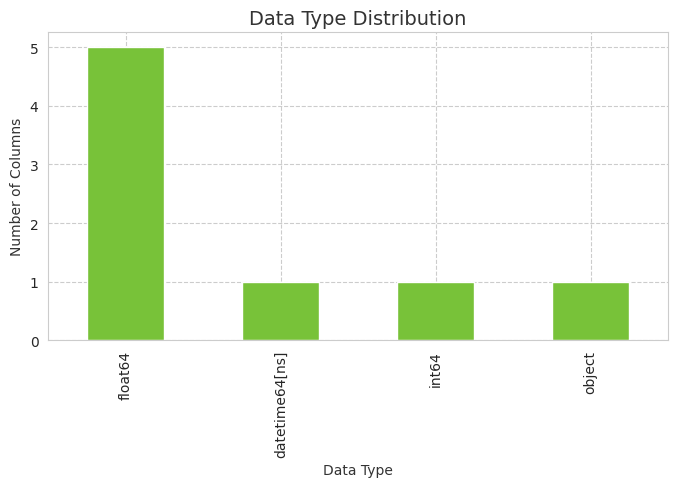

In [8]:
dtype_counts = df.dtypes.value_counts()

plt.figure(figsize=(8,4))
dtype_counts.plot(kind='bar')
plt.title("Data Type Distribution", fontsize=14)
plt.ylabel("Number of Columns")
plt.xlabel("Data Type")
plt.show()

### **📌 1.4 Duplicate Date Detection**
**🔍 Insight**

- Duplicate dates can corrupt rolling metrics & returns
- Rare but critical in stock data

**📊 Plot: Duplicate Dates Count**

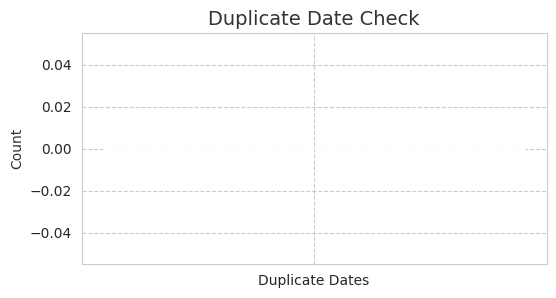

In [9]:
duplicate_dates = df.duplicated(subset='Date').sum()

plt.figure(figsize=(6,3))
plt.bar(["Duplicate Dates"], [duplicate_dates])
plt.title("Duplicate Date Check", fontsize=14)
plt.ylabel("Count")
plt.show()

# **📈 2. Long-Term Price Evolution (1973-2026)**

### **📊 2.1 Overall Price Growth (50+ Years)**
**🔍 Insight**

- Shows NextEra Energy’s full historical journey
- Highlights massive long-term wealth creation
- Foundation plot for any stock EDA

**📈 Plot: Adjusted Close Price Over Time**

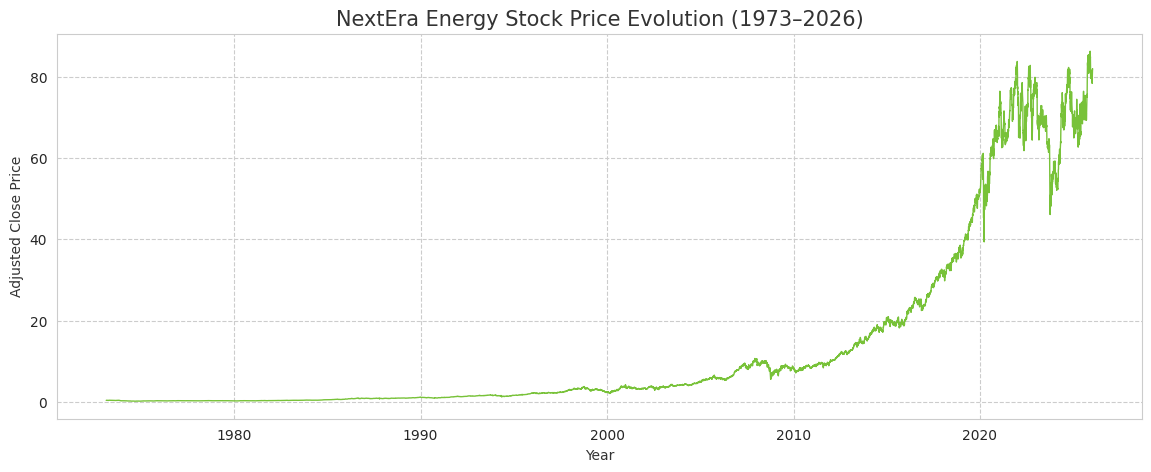

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Adj_Close'], linewidth=1)
plt.title("NextEra Energy Stock Price Evolution (1973–2026)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

### **📉 2.2 Bull & Bear Market Phases**
**🔍 Insight**

- Highlights prolonged uptrends and downturns
- Makes market cycles visually obvious

**📈 Plot: Rolling Trend (200-Day Moving Average)**

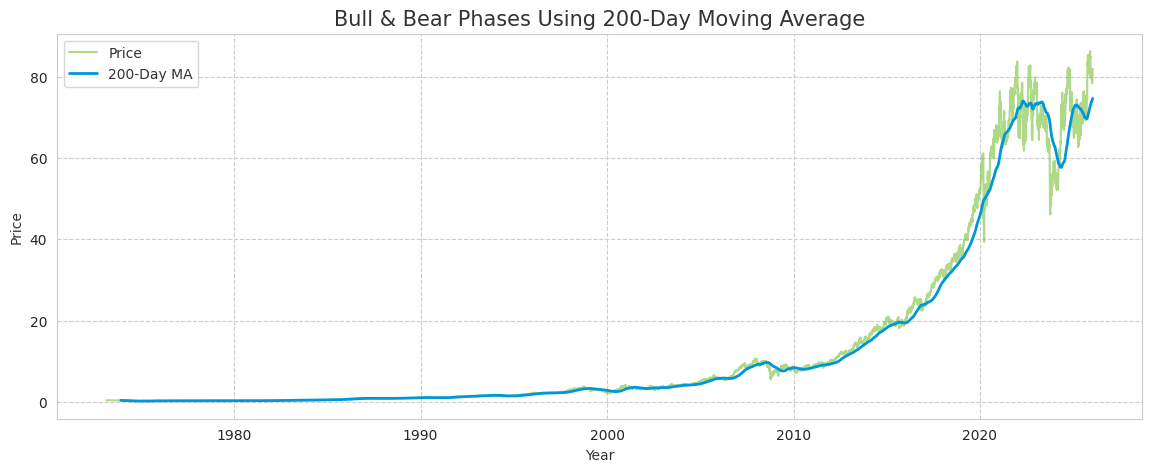

In [11]:
df['MA_200'] = df['Adj_Close'].rolling(200).mean()

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Adj_Close'], alpha=0.6, label="Price")
plt.plot(df['Date'], df['MA_200'], linewidth=2, label="200-Day MA")
plt.title("Bull & Bear Phases Using 200-Day Moving Average", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

### **⚠️ 2.3 Structural Breaks & Regime Changes**
**🔍 Insight**

- Captures sudden shifts in market behavior
- Indicates major economic or company-level transitions

**📊 Plot: Log-Scaled Price (Best for Long Horizons)**

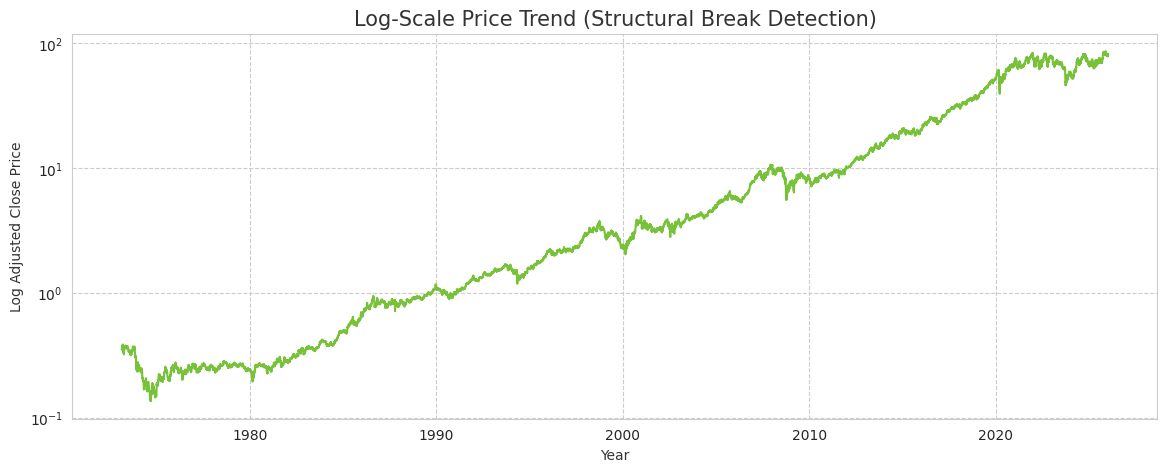

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Adj_Close'])
plt.yscale("log")
plt.title("Log-Scale Price Trend (Structural Break Detection)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Log Adjusted Close Price")
plt.show()

### **🕰️ 2.4 Early Era vs Modern Era Comparison**
**🔍 Insight**

- Compares NextEra Energy’s growth phase vs maturity phase
- Shows evolution of volatility and price stability

**📊 Plot: Two Era Comparison**

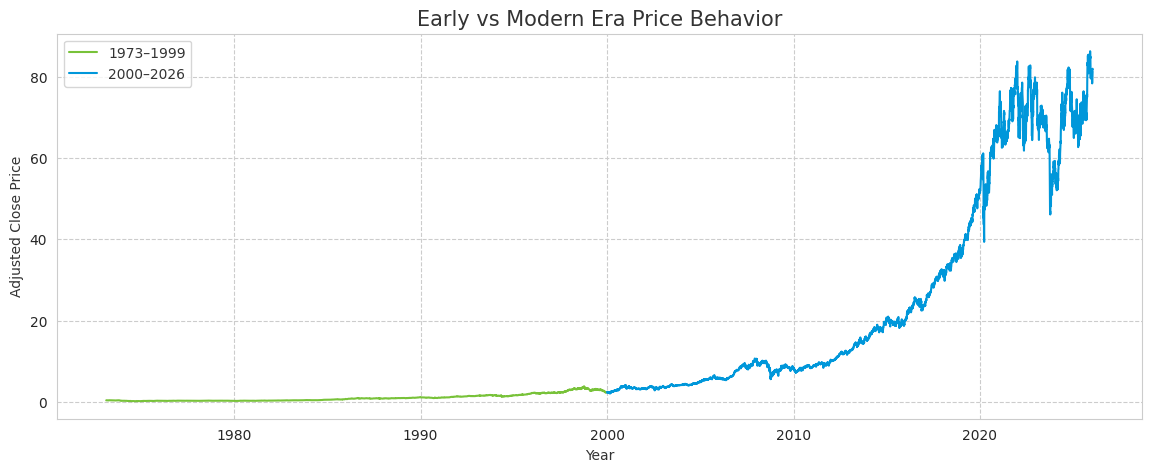

In [13]:
early = df[df['Date'] < "2000-01-01"]
modern = df[df['Date'] >= "2000-01-01"]

plt.figure(figsize=(14,5))
plt.plot(early['Date'], early['Adj_Close'], label="1973–1999")
plt.plot(modern['Date'], modern['Adj_Close'], label="2000–2026")
plt.title("Early vs Modern Era Price Behavior", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

# **📉 3. Daily Price Behavior (OHLC Analysis)**

### **📊 3.1 Relationship Between Open, High, Low & Close**
**🔍 Insight**

- Confirms internal price consistency
- Strong correlations are expected in liquid stocks

**📈 Plot: OHLC Correlation Heatmap**

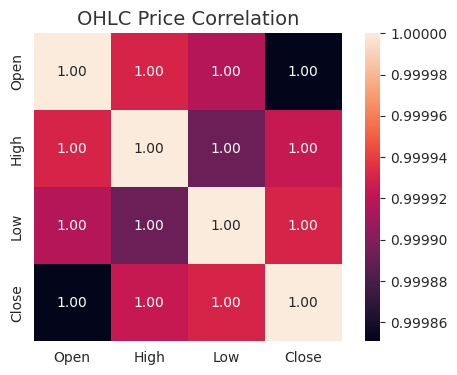

In [14]:
ohlc_cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(6,4))
sns.heatmap(df[ohlc_cols].corr(), annot=True, fmt=".2f", square=True)
plt.title("OHLC Price Correlation", fontsize=14)
plt.show()

### **📏 3.2 Average Daily Price Range (High − Low)**
**🔍 Insight**

- Measures intraday volatility
- Higher values = more price movement within a day

**📊 Plot: Daily Price Range Over Time**

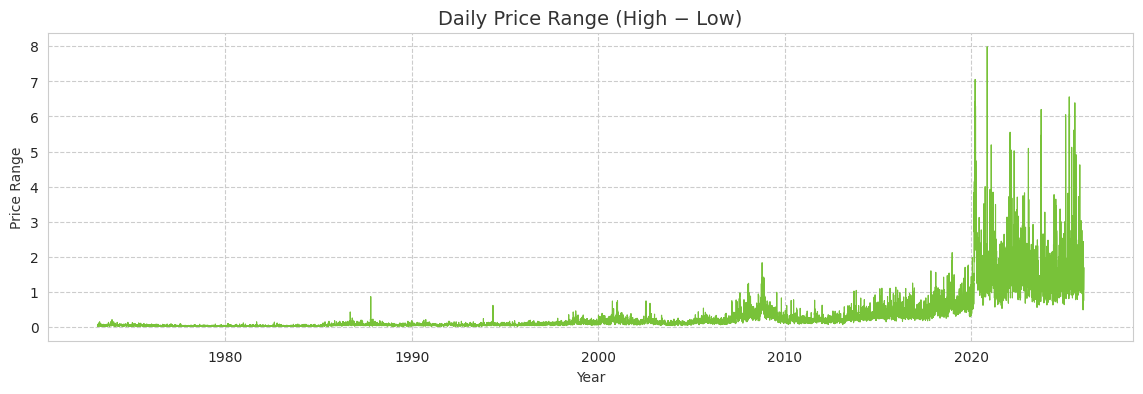

In [15]:
df['Daily_Range'] = df['High'] - df['Low']

plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Daily_Range'], linewidth=0.8)
plt.title("Daily Price Range (High − Low)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Price Range")
plt.show()

### **📉 3.3 Frequency of Large Intraday Swings**
**🔍 Insight**

- Identifies how often NextEra Energy experiences unusual daily moves
- Useful for short-term traders and risk analysis

**📊 Plot: Distribution of Daily Price Range**

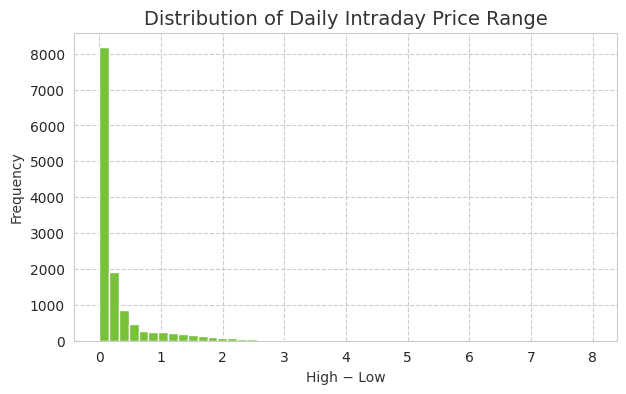

In [16]:
plt.figure(figsize=(7,4))
plt.hist(df['Daily_Range'], bins=50)
plt.title("Distribution of Daily Intraday Price Range", fontsize=14)
plt.xlabel("High − Low")
plt.ylabel("Frequency")
plt.show()

### **🔄 3.4 Stability of Close Price Relative to Open**
**🔍 Insight**

- Shows daily sentiment (bullish vs bearish closes)
- Measures intraday direction strength

**📊 Plot: Close − Open Distribution**

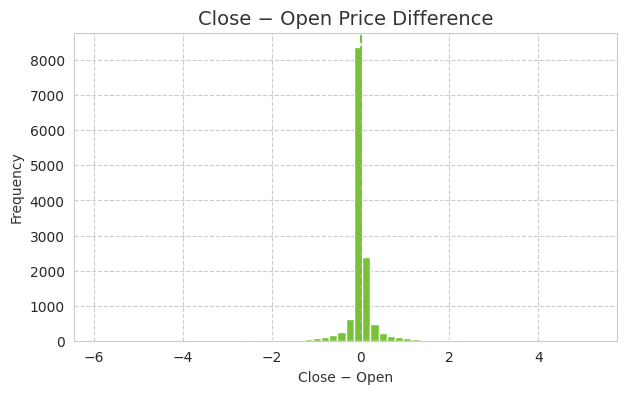

In [17]:
df['Close_Open_Diff'] = df['Close'] - df['Open']

plt.figure(figsize=(7,4))
plt.hist(df['Close_Open_Diff'], bins=60)
plt.axvline(0, linestyle='--')
plt.title("Close − Open Price Difference", fontsize=14)
plt.xlabel("Close − Open")
plt.ylabel("Frequency")
plt.show()

### **📊 3.5 Intraday Movement Magnitude (Normalized)**
**🔍 Insight**

- Makes early and modern price eras comparable
- Controls for price level inflation over decades

**📈 Plot: Percentage Intraday Range**

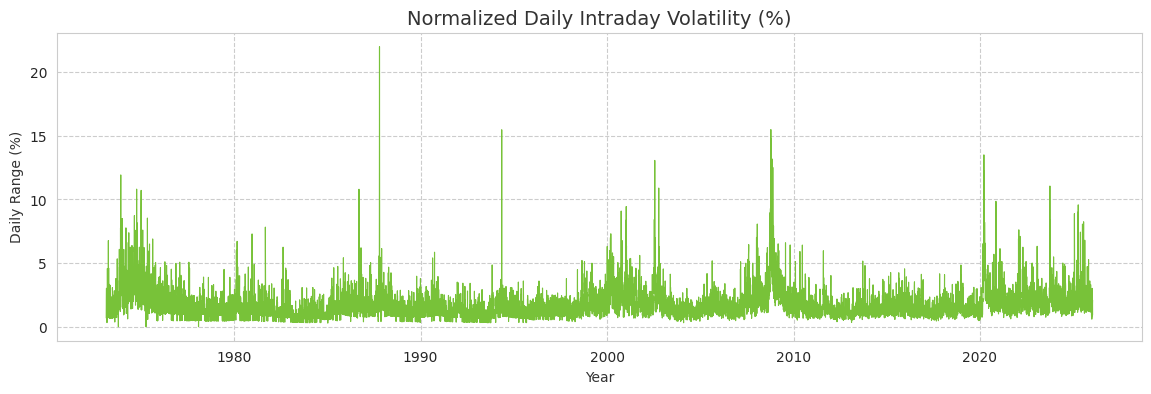

In [18]:
df['Daily_Range_Pct'] = (df['High'] - df['Low']) / df['Open'] * 100

plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Daily_Range_Pct'], linewidth=0.8)
plt.title("Normalized Daily Intraday Volatility (%)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Daily Range (%)")
plt.show()

# **🔄 4. Volatility & Risk Characteristics**

### **📊 4.1 Daily Returns (Foundation for Volatility)**
**🔍 Insight**

- Volatility is measured on returns, not prices
- Captures real market risk

In [19]:
df['Daily_Return'] = df['Adj_Close'].pct_change()

### **📈 4.2 Rolling Volatility (30-Day & 1-Year)**
**🔍 Insight**

- Short-term vs long-term risk comparison
- Identifies calm vs turbulent periods

**📊 Plot: Rolling Volatility**

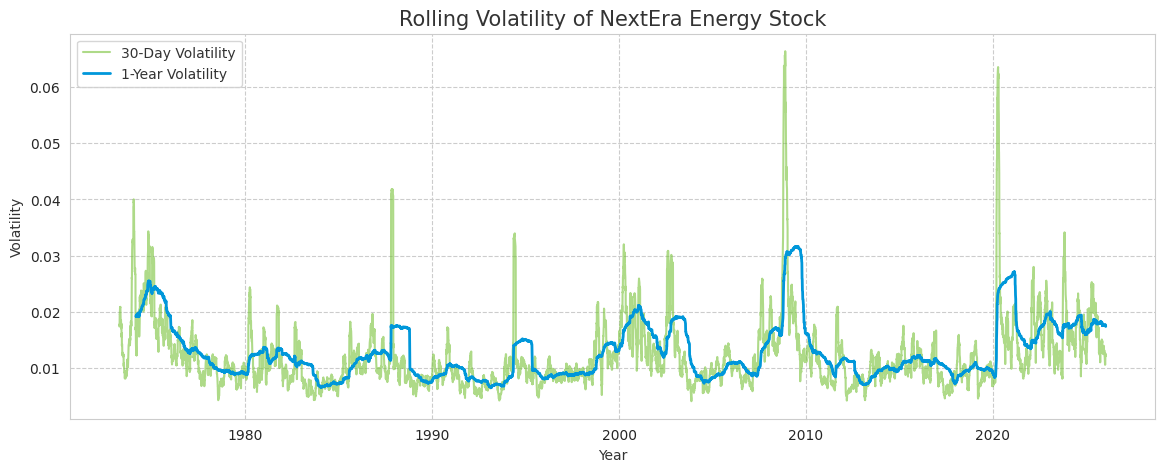

In [20]:
df['Vol_30D'] = df['Daily_Return'].rolling(30).std()
df['Vol_252D'] = df['Daily_Return'].rolling(252).std()

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Vol_30D'], alpha=0.6, label="30-Day Volatility")
plt.plot(df['Date'], df['Vol_252D'], linewidth=2, label="1-Year Volatility")
plt.title("Rolling Volatility of NextEra Energy Stock", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.legend()
plt.show()

### **⚠️ 4.3 Volatility Clustering (Crisis Detection)**
**🔍 Insight**

- Financial markets exhibit volatility clustering
- High-volatility periods tend to follow each other

**📊 Plot: Volatility Clusters Over Time**

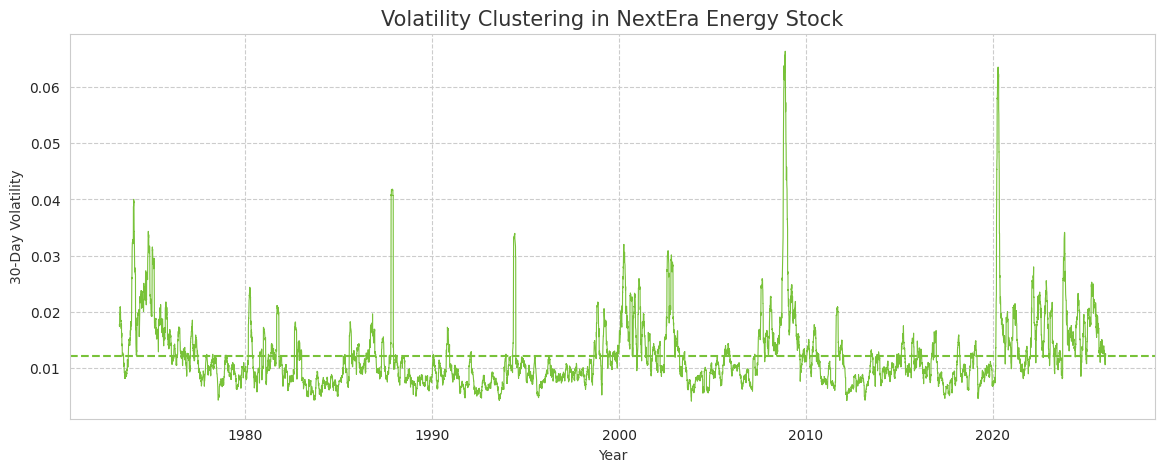

In [21]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Vol_30D'], linewidth=0.8)
plt.axhline(df['Vol_30D'].mean(), linestyle='--')
plt.title("Volatility Clustering in NextEra Energy Stock", fontsize=15)
plt.xlabel("Year")
plt.ylabel("30-Day Volatility")
plt.show()

### **📆 4.4 Volatility Comparison Across Decades**
**🔍 Insight**

- Reveals how NextEra Energy’s risk profile evolved
- Shows transition from growth-stage volatility to maturity

**📊 Plot: Decade-wise Volatility**

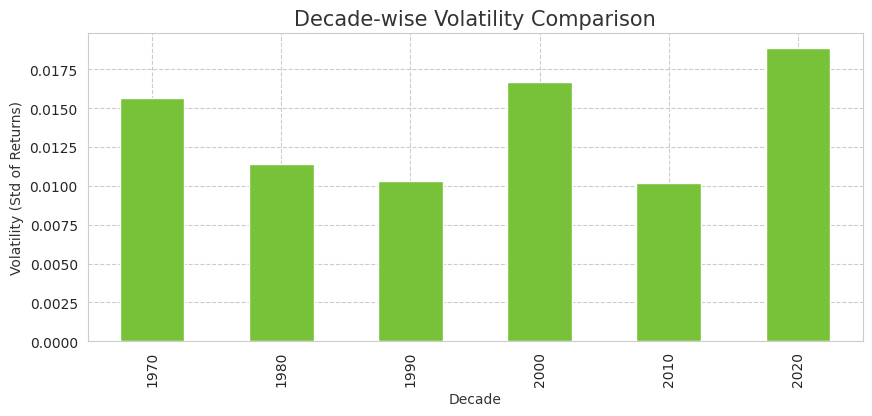

In [22]:
df['Decade'] = (df['Date'].dt.year // 10) * 10
decade_vol = df.groupby('Decade')['Daily_Return'].std()

plt.figure(figsize=(10,4))
decade_vol.plot(kind='bar')
plt.title("Decade-wise Volatility Comparison", fontsize=15)
plt.xlabel("Decade")
plt.ylabel("Volatility (Std of Returns)")
plt.show()

# **📊 5. Return Analysis (Most Important for Finance EDA)**

### **📈 5.1 Daily Returns Distribution**
**🔍 Insight**

- Shows how NextEra Energy stock behaves on a daily basis
- Core plot for risk and return understanding

**📊 Plot: Histogram of Daily Returns**

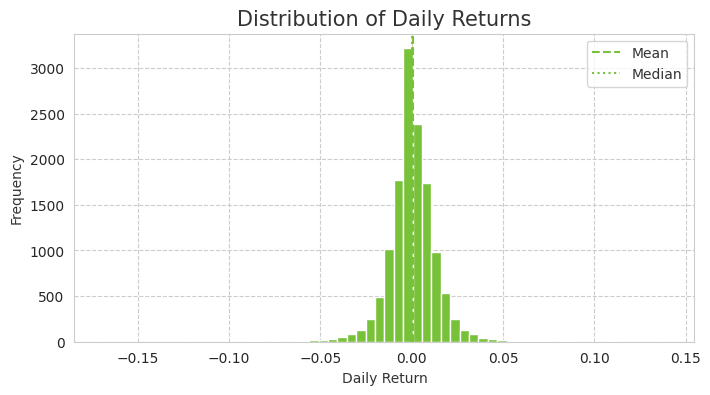

In [23]:
daily_returns = df['Daily_Return'].dropna()

plt.figure(figsize=(8,4))
plt.hist(daily_returns, bins=60)
plt.axvline(daily_returns.mean(), linestyle='--', label='Mean')
plt.axvline(daily_returns.median(), linestyle=':', label='Median')
plt.title("Distribution of Daily Returns", fontsize=15)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **📊 5.2 Mean vs Median Returns**
**🔍 Insight**

- Mean captures average growth
- Median captures typical day
- Difference indicates asymmetry

**📈 Plot: Mean vs Median Comparison**

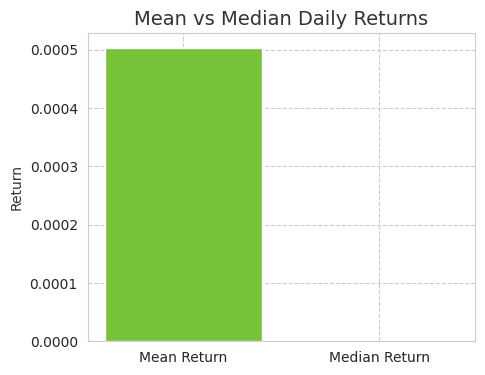

In [24]:
plt.figure(figsize=(5,4))
plt.bar(['Mean Return', 'Median Return'],
        [daily_returns.mean(), daily_returns.median()])
plt.title("Mean vs Median Daily Returns", fontsize=14)
plt.ylabel("Return")
plt.show()

### **⚠️ 5.3 Fat Tails & Extreme Returns**
**🔍 Insight**

- Financial returns are not normally distributed
- Fat tails imply higher crash & rally risk

**📊 Plot: Tail-Focused Return Distribution**

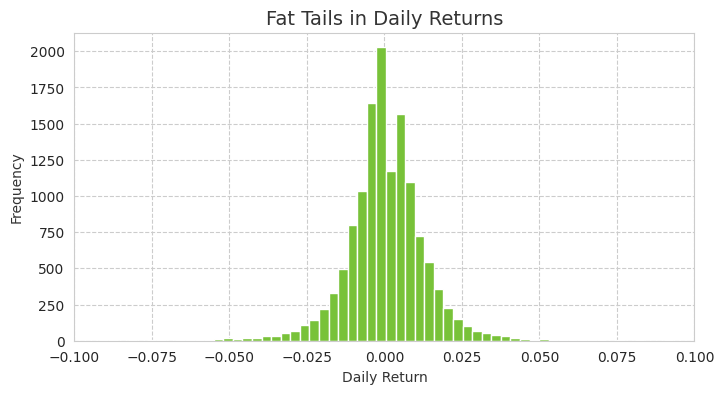

In [25]:
plt.figure(figsize=(8,4))
plt.hist(daily_returns, bins=100)
plt.xlim(-0.1, 0.1)
plt.title("Fat Tails in Daily Returns", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

### **🔀 5.4 Skewness & Asymmetry**
**🔍 Insight**

- Determines whether returns favor upside or downside
- Critical for portfolio risk assessment

**📊 Plot: Return Distribution with Zero Line**

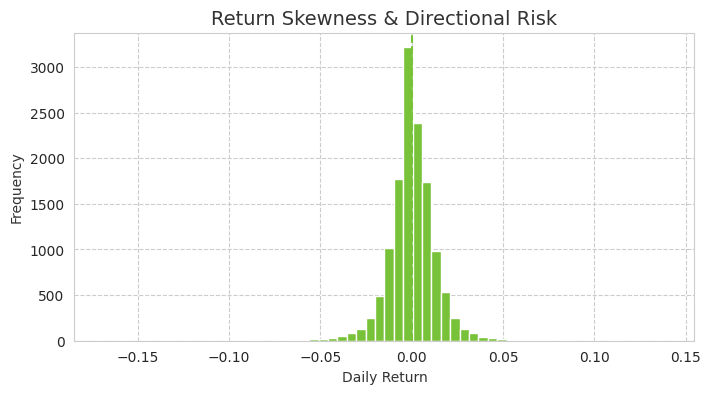

In [26]:
plt.figure(figsize=(8,4))
plt.hist(daily_returns, bins=60)
plt.axvline(0, linestyle='--')
plt.title("Return Skewness & Directional Risk", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [27]:
print("Skewness:", skew(daily_returns))
print("Kurtosis:", kurtosis(daily_returns))

Skewness: 0.02253097070886314
Kurtosis: 11.822321691835617


### **📉 5.5 Log Returns**
**🔍 Insight**

- Log returns handle long horizons better
- Standard in academic finance

**📊 Plot: Log Return Distribution**

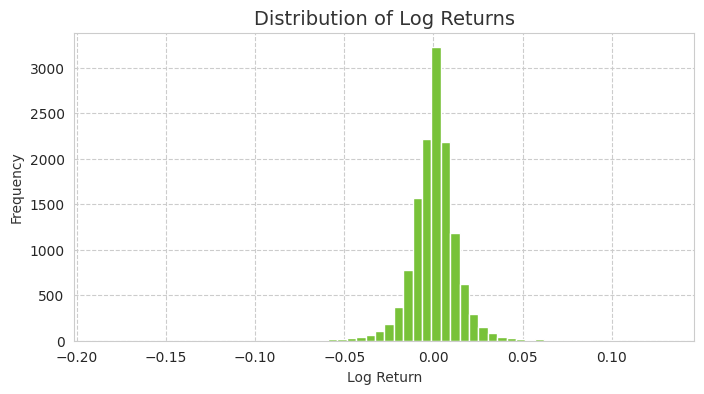

In [28]:
df['Log_Return'] = np.log(df['Adj_Close'] / df['Adj_Close'].shift(1))
log_returns = df['Log_Return'].dropna()

plt.figure(figsize=(8,4))
plt.hist(log_returns, bins=60)
plt.title("Distribution of Log Returns", fontsize=14)
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

# **🧠 6. Market Regimes & Cycles**

### **📊 6.1 Identify Market Regimes Using Moving Averages**
**🔍 Insight**

- Simple & powerful way to detect:
  - Expansion (bull)
  - Contraction (bear)
- Industry-standard technique

**📈 Plot: Price vs Long-Term Trend**

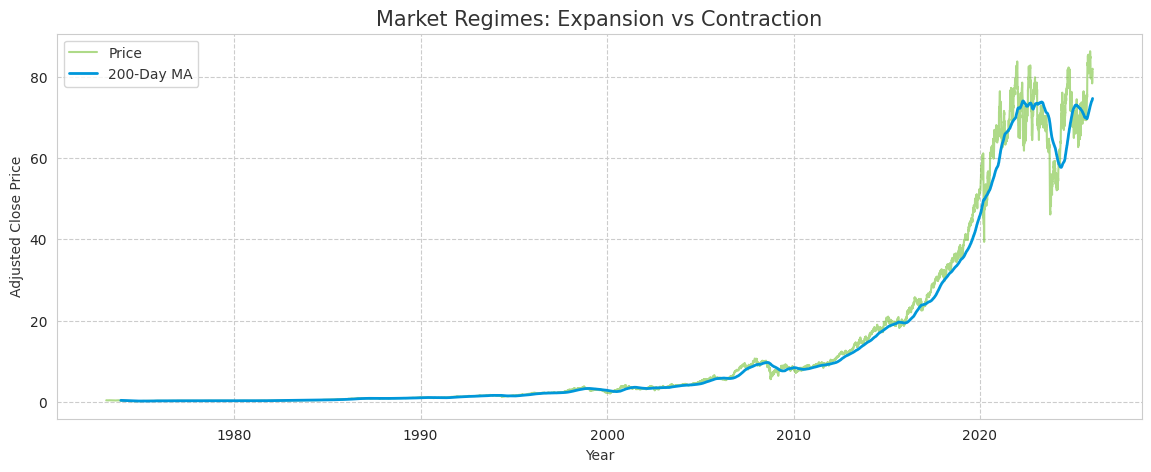

In [29]:
df['MA_200'] = df['Adj_Close'].rolling(200).mean()

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Adj_Close'], alpha=0.6, label="Price")
plt.plot(df['Date'], df['MA_200'], linewidth=2, label="200-Day MA")
plt.title("Market Regimes: Expansion vs Contraction", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

### **📉 6.2 Crash & Recovery Phases (Drawdown Analysis)**
**🔍 Insight**

- Measures how deep crashes are
- Shows recovery behavior after downturns

**📊 Plot: Drawdown Curve**

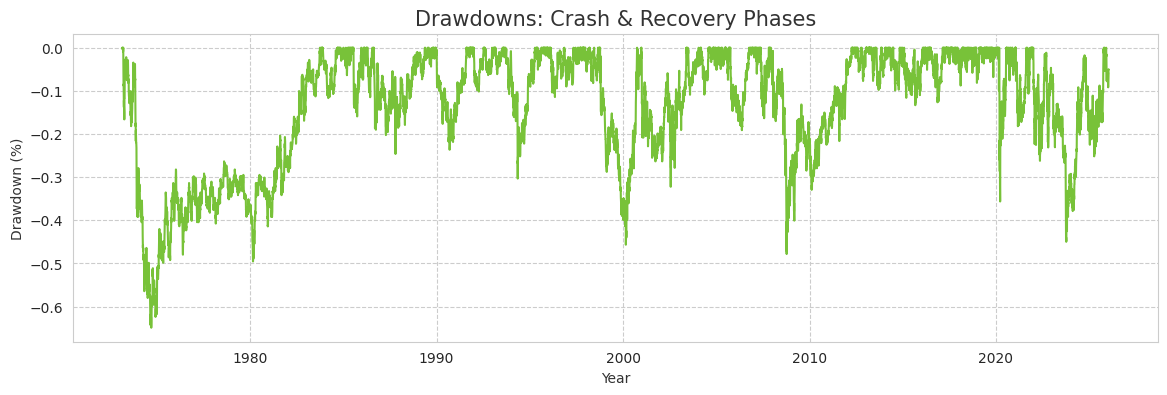

In [30]:
rolling_max = df['Adj_Close'].cummax()
drawdown = (df['Adj_Close'] - rolling_max) / rolling_max

plt.figure(figsize=(14,4))
plt.plot(df['Date'], drawdown)
plt.title("Drawdowns: Crash & Recovery Phases", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Drawdown (%)")
plt.show()

### **⏳ 6.3 Duration of Bullish vs Bearish Phases**
**🔍 Insight**

- Quantifies how long NextEra Energy stays bullish vs bearish
- Indicates dominance of growth vs contraction

**📊 Plot: Regime Duration Comparison**

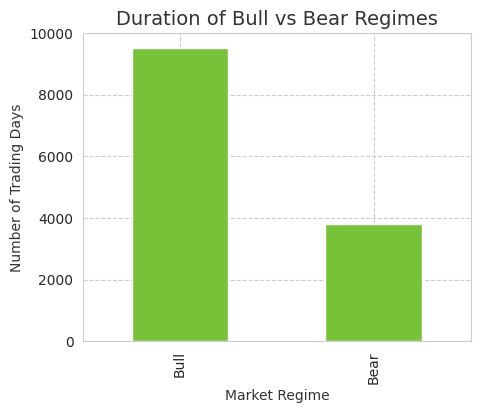

In [31]:
df['Regime'] = np.where(df['Adj_Close'] > df['MA_200'], 'Bull', 'Bear')
regime_duration = df['Regime'].value_counts()

plt.figure(figsize=(5,4))
regime_duration.plot(kind='bar')
plt.title("Duration of Bull vs Bear Regimes", fontsize=14)
plt.ylabel("Number of Trading Days")
plt.xlabel("Market Regime")
plt.show()

### **📆 6.4 Recovery Time After Major Drops**
**🔍 Insight**

- Shows how fast NextEra Energy rebounds after crises
- Very important for long-term investors

**📊 Plot: Rolling Drawdown with Recovery Emphasis**

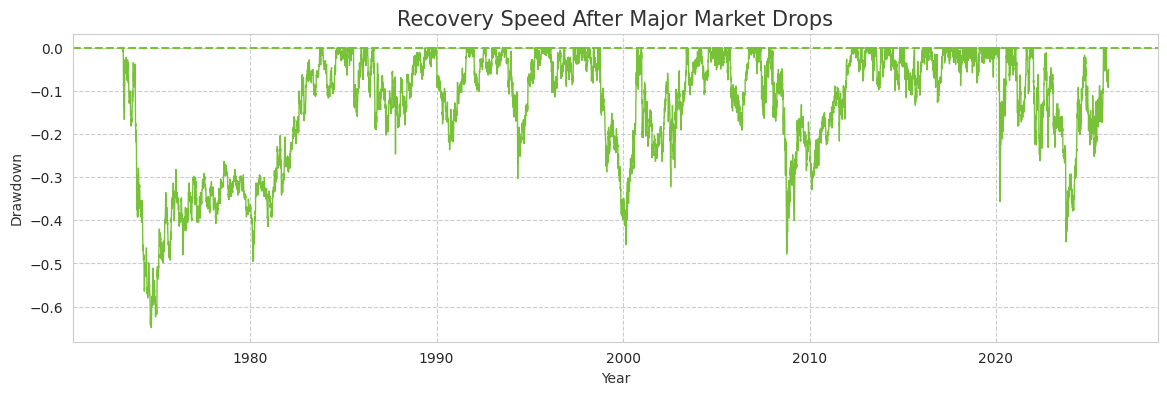

In [32]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], drawdown, linewidth=1)
plt.axhline(0, linestyle='--')
plt.title("Recovery Speed After Major Market Drops", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Drawdown")
plt.show()

### **📦 6.5 Market Phases Summary**
**🔍 Insight**

- Compresses market history into regimes
- Makes cycles visually intuitive

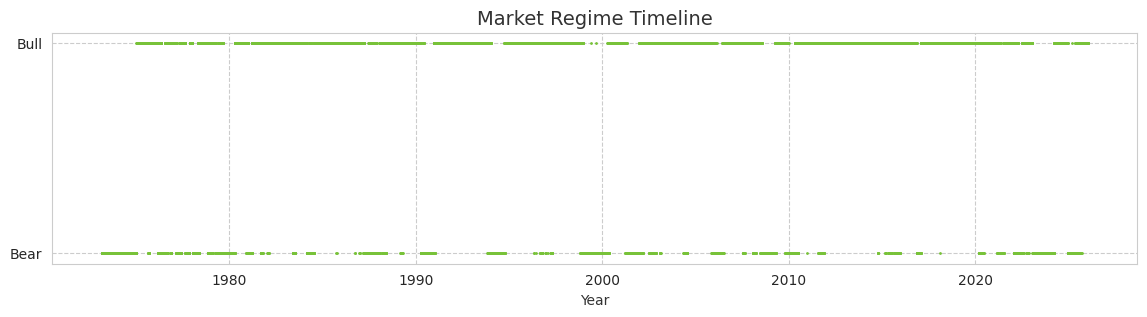

In [33]:
plt.figure(figsize=(14,3))
plt.scatter(df['Date'], df['Regime'].map({'Bull': 1, 'Bear': 0}), s=1)
plt.yticks([0,1], ['Bear', 'Bull'])
plt.title("Market Regime Timeline", fontsize=14)
plt.xlabel("Year")
plt.show()

# **📦 7. Volume Dynamics (Investor Behavior)**

### **📊 7.1 Long-Term Trading Volume Trend**
**🔍 Insight**

- Shows evolution of market participation
- Identifies growth in institutional involvement

**📈 Plot: Trading Volume Over Time**

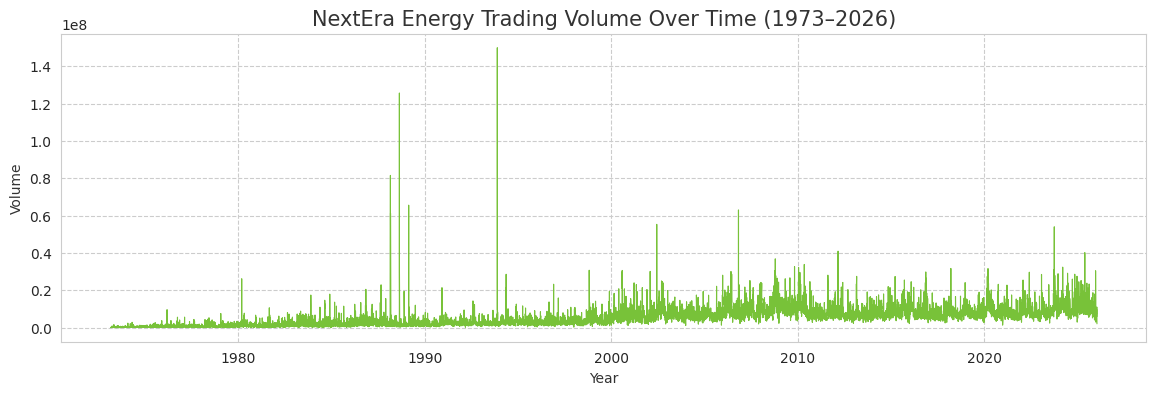

In [34]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Volume'], linewidth=0.8)
plt.title("NextEra Energy Trading Volume Over Time (1973–2026)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

### **📈 7.2 Volume vs Price (Dual-Axis View)**
**🔍 Insight**

- Highlights volume behavior during:
  - Breakouts
  - Crashes
  - Strong trends

**📊 Plot: Price & Volume Together**

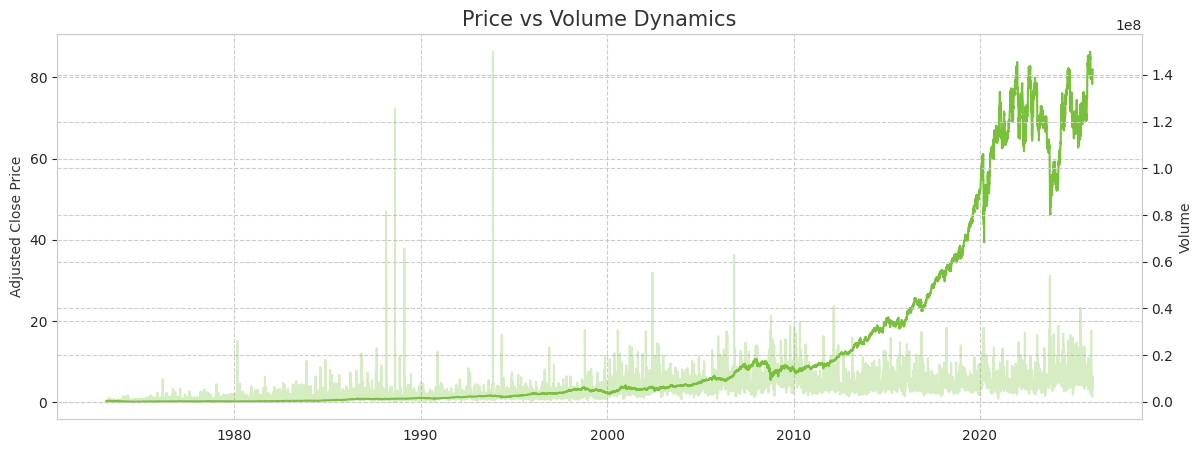

In [35]:
fig, ax1 = plt.subplots(figsize=(14,5))

ax1.plot(df['Date'], df['Adj_Close'], label='Price')
ax1.set_ylabel("Adjusted Close Price")

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Volume'], alpha=0.3)
ax2.set_ylabel("Volume")

plt.title("Price vs Volume Dynamics", fontsize=15)
plt.show()

### **⚠️ 7.3 Volume Spikes During High Volatility**
**🔍 Insight**

- Panic and institutional trading often coincide with volatility

**📊 Plot: Volume vs Volatility**

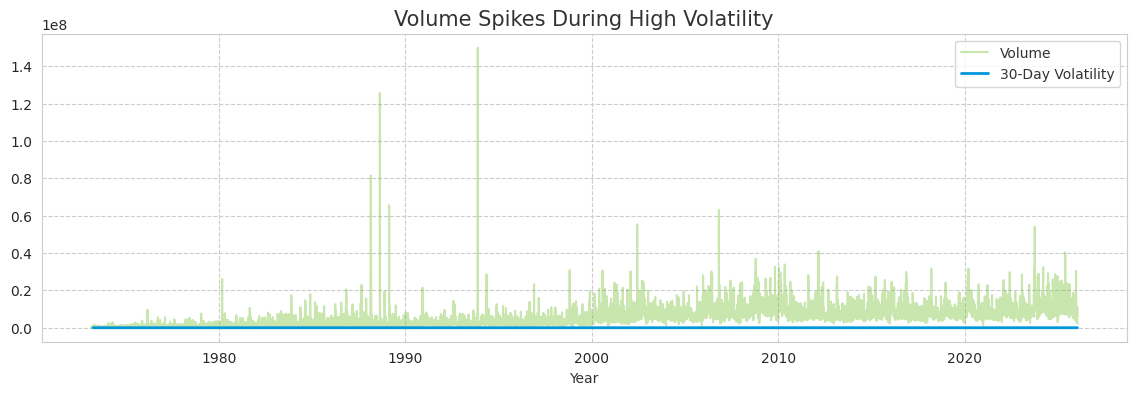

In [36]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Volume'], alpha=0.4, label="Volume")
plt.plot(df['Date'], df['Vol_30D'], linewidth=2, label="30-Day Volatility")
plt.title("Volume Spikes During High Volatility", fontsize=15)
plt.xlabel("Year")
plt.legend()
plt.show()

### **🔄 7.4 Price–Volume Relationship (Direction Matters)**
**🔍 Insight**

- Classic market rule:
- Rising price + rising volume → strong bullish conviction
- Falling price + rising volume → panic selling

**📊 Plot: Price Change vs Volume**

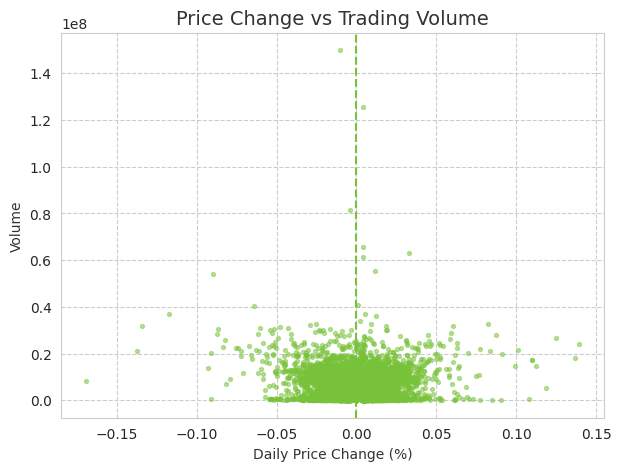

In [37]:
df['Price_Change'] = df['Adj_Close'].pct_change()

plt.figure(figsize=(7,5))
plt.scatter(df['Price_Change'], df['Volume'], s=8, alpha=0.5)
plt.axvline(0, linestyle='--')
plt.title("Price Change vs Trading Volume", fontsize=14)
plt.xlabel("Daily Price Change (%)")
plt.ylabel("Volume")
plt.show()

### **📦 7.5 Volume Distribution (Normal vs Extreme Days)**
**🔍 Insight**

- Separates normal trading days from abnormal ones

**📊 Plot: Volume Distribution**

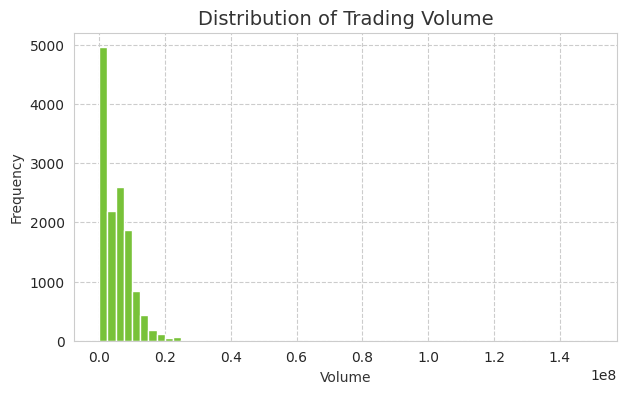

In [38]:
plt.figure(figsize=(7,4))
plt.hist(df['Volume'], bins=60)
plt.title("Distribution of Trading Volume", fontsize=14)
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

# **🔗 8. Feature Relationships (Correlation)**

### **📊 8.1 OHLC Price Correlation (Sanity Check)**
**🔍 Insight**

- OHLC prices should be highly correlated
- Confirms data consistency and market liquidity

**📈 Plot: OHLC Correlation Heatmap**

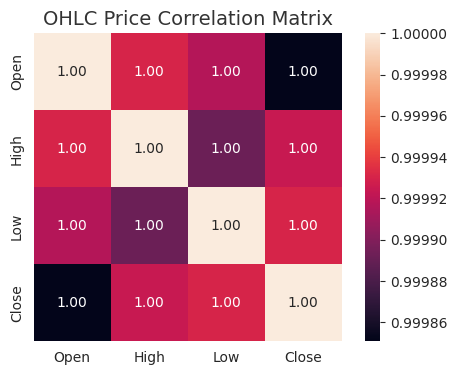

In [39]:
ohlc_cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(6,4))
sns.heatmap(df[ohlc_cols].corr(),
            annot=True,
            fmt=".2f",
            square=True)
plt.title("OHLC Price Correlation Matrix", fontsize=14)
plt.show()

### **📦 8.2 Volume vs Price Movement Correlation**
**🔍 Insight**

- Tests whether trading activity moves prices
- Important for understanding momentum & liquidity

**📊 Plot: Volume vs Daily Returns**

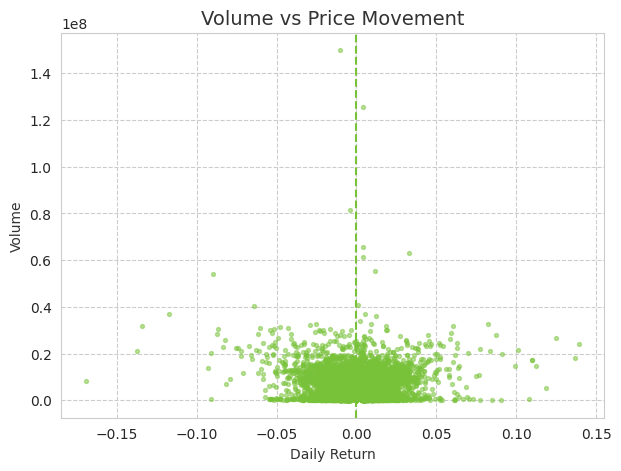

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(df['Daily_Return'], df['Volume'], s=8, alpha=0.5)
plt.axvline(0, linestyle='--')
plt.title("Volume vs Price Movement", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Volume")
plt.show()

### **⚠️ 8.3 Volume vs Volatility Relationship**
**🔍 Insight**

- Volume usually rises when risk rises
- Confirms panic or institutional participation

**📊 Plot: Volume vs Volatility**

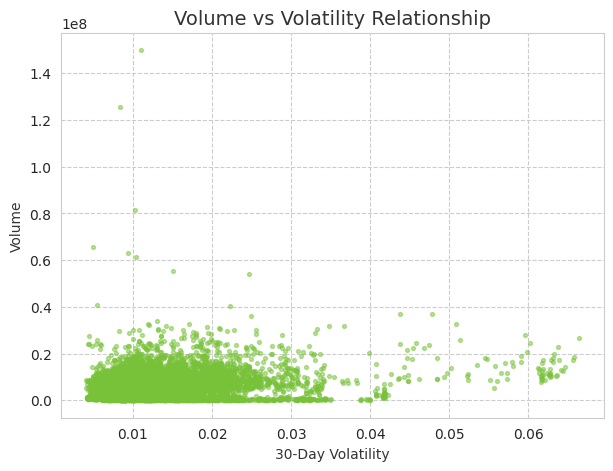

In [41]:
plt.figure(figsize=(7,5))
plt.scatter(df['Vol_30D'], df['Volume'], s=8, alpha=0.5)
plt.title("Volume vs Volatility Relationship", fontsize=14)
plt.xlabel("30-Day Volatility")
plt.ylabel("Volume")
plt.show()

### **⏱️ 8.4 Does Volume Lead Price Movement? (Lag Analysis)**
**🔍 Insight**

- Tests whether volume spikes precede price changes

**📊 Plot: Lagged Correlation**

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


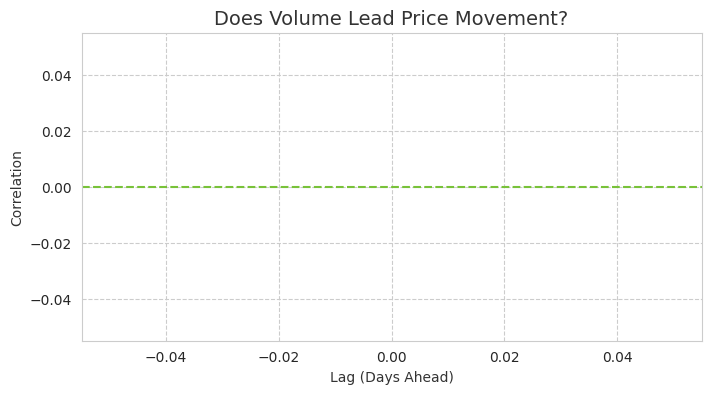

In [42]:
df['Volume_Change'] = df['Volume'].pct_change()

lag_corr = []
lags = range(1, 11)

for lag in lags:
    lag_corr.append(
        df['Volume_Change'].corr(df['Daily_Return'].shift(-lag))
    )

plt.figure(figsize=(8,4))
plt.plot(lags, lag_corr, marker='o')
plt.axhline(0, linestyle='--')
plt.title("Does Volume Lead Price Movement?", fontsize=14)
plt.xlabel("Lag (Days Ahead)")
plt.ylabel("Correlation")
plt.show()

# **📆 9. Time-Based Patterns**

### **📊 9.1 Yearly Average Returns**
**🔍 Insight**

- Smooths daily noise
- Shows long-term performance consistency

**📈 Plot: Average Annual Returns**

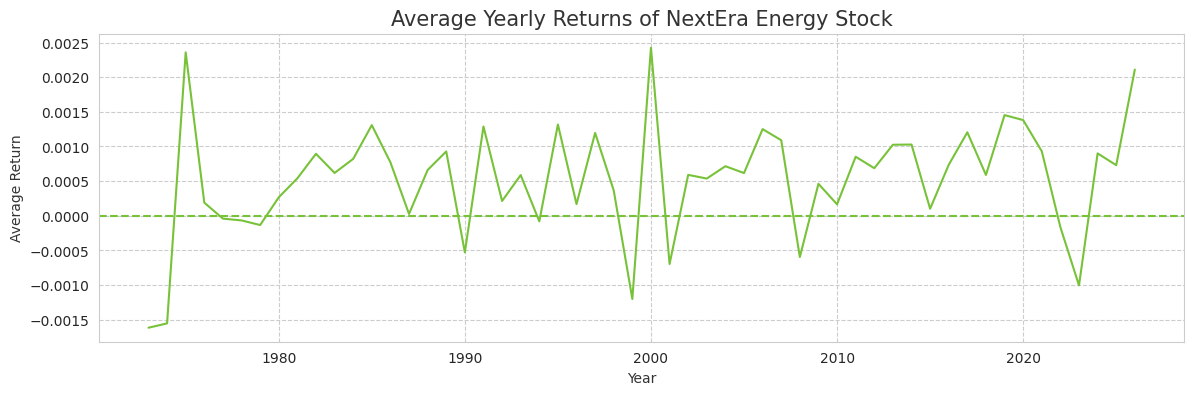

In [43]:
df['Year'] = df['Date'].dt.year
yearly_returns = df.groupby('Year')['Daily_Return'].mean()

plt.figure(figsize=(14,4))
yearly_returns.plot()
plt.axhline(0, linestyle='--')
plt.title("Average Yearly Returns of NextEra Energy Stock", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Return")
plt.show()

### **🏆 9.2 Best & Worst Performing Years**
**🔍 Insight**

- Identifies extreme performance periods
- Useful for historical context

**📊 Plot: Top & Bottom Years**

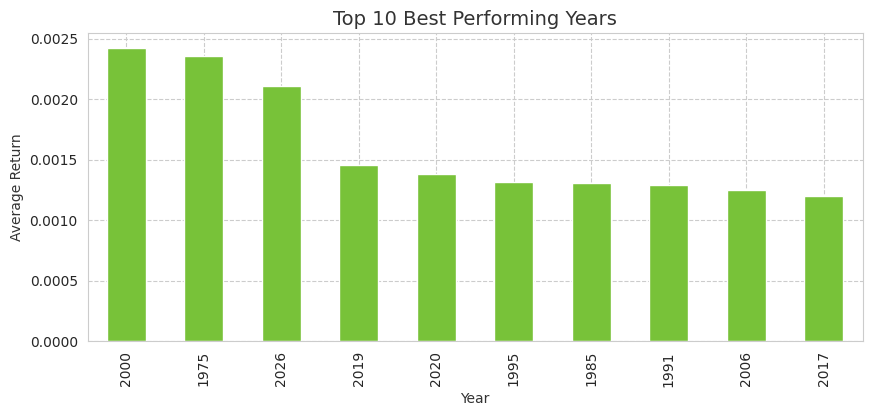

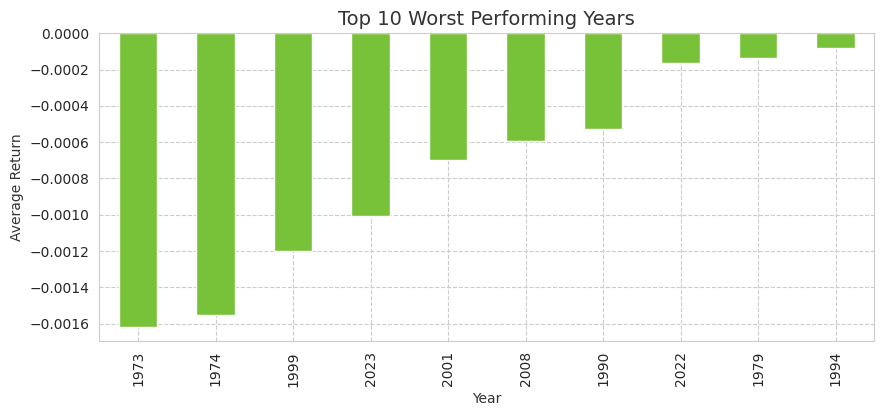

In [44]:
top_years = yearly_returns.sort_values(ascending=False).head(10)
bottom_years = yearly_returns.sort_values().head(10)

plt.figure(figsize=(10,4))
top_years.plot(kind='bar')
plt.title("Top 10 Best Performing Years", fontsize=14)
plt.ylabel("Average Return")
plt.show()

plt.figure(figsize=(10,4))
bottom_years.plot(kind='bar')
plt.title("Top 10 Worst Performing Years", fontsize=14)
plt.ylabel("Average Return")
plt.show()

### **🕰️ 9.3 Decade-Wise Performance Comparison**
**🔍 Insight**

- Reveals NextEra Energy’s golden era
- Compares growth stages vs maturity stages

**📊 Plot: Decade-wise Average Returns**

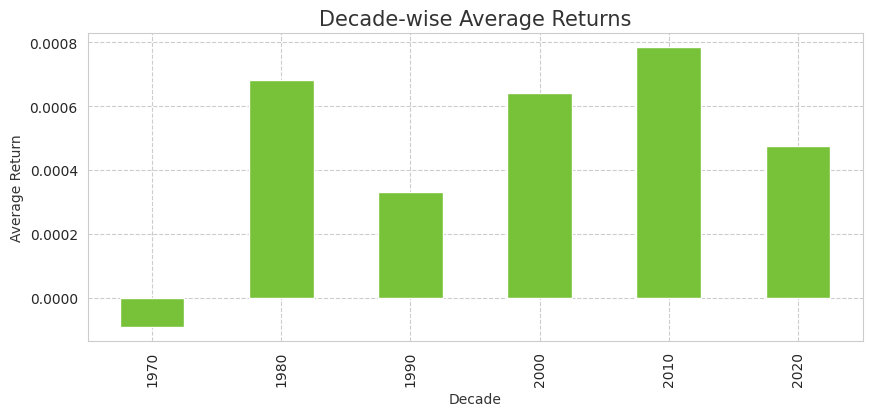

In [45]:
df['Decade'] = (df['Year'] // 10) * 10
decade_returns = df.groupby('Decade')['Daily_Return'].mean()

plt.figure(figsize=(10,4))
decade_returns.plot(kind='bar')
plt.title("Decade-wise Average Returns", fontsize=15)
plt.xlabel("Decade")
plt.ylabel("Average Return")
plt.show()

### **⚠️ 9.4 Volatility Changes Over Decades**
**🔍 Insight**

- Shows how NextEra Energy’s risk profile evolved
- Important for investment strategy shifts

**📊 Plot: Decade-wise Volatility**

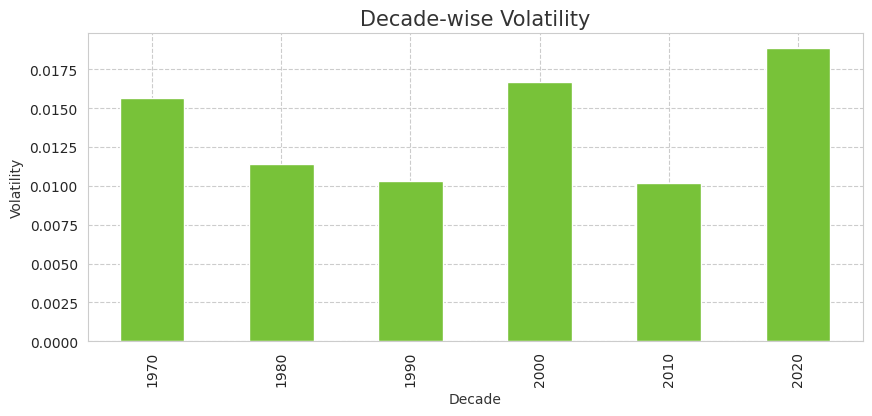

In [46]:
decade_volatility = df.groupby('Decade')['Daily_Return'].std()

plt.figure(figsize=(10,4))
decade_volatility.plot(kind='bar')
plt.title("Decade-wise Volatility", fontsize=15)
plt.xlabel("Decade")
plt.ylabel("Volatility")
plt.show()

# **⚠️ 10. Extreme Events & Outliers**

### **📊 10.1 Largest Single-Day Gains & Losses**
**🔍 Insight**

- Identifies extreme daily market moves
- Useful for risk management

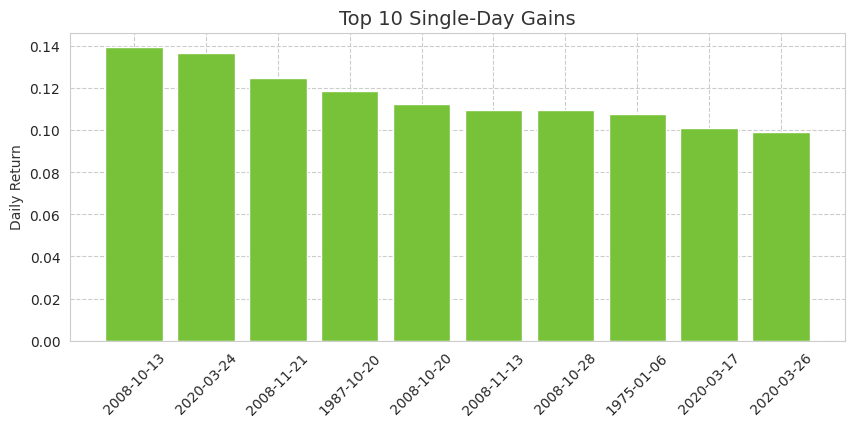

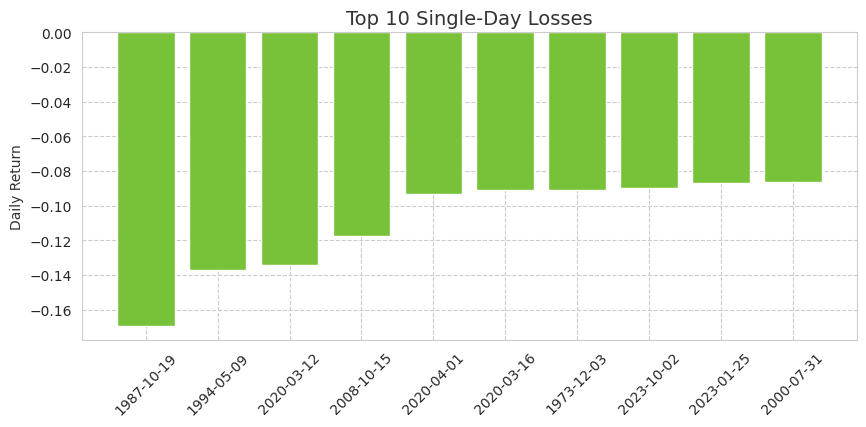

In [47]:
top_gains = df.nlargest(10, 'Daily_Return')[['Date', 'Daily_Return']]
top_losses = df.nsmallest(10, 'Daily_Return')[['Date', 'Daily_Return']]

plt.figure(figsize=(10,4))
plt.bar(top_gains['Date'].dt.strftime('%Y-%m-%d'), top_gains['Daily_Return'])
plt.xticks(rotation=45)
plt.title("Top 10 Single-Day Gains", fontsize=14)
plt.ylabel("Daily Return")
plt.show()

plt.figure(figsize=(10,4))
plt.bar(top_losses['Date'].dt.strftime('%Y-%m-%d'), top_losses['Daily_Return'])
plt.xticks(rotation=45)
plt.title("Top 10 Single-Day Losses", fontsize=14)
plt.ylabel("Daily Return")
plt.show()

### **📈 10.2 Highest Volatility Days**
**🔍 Insight**

- Days with unusually high price swings
- Detects market panic or exuberance

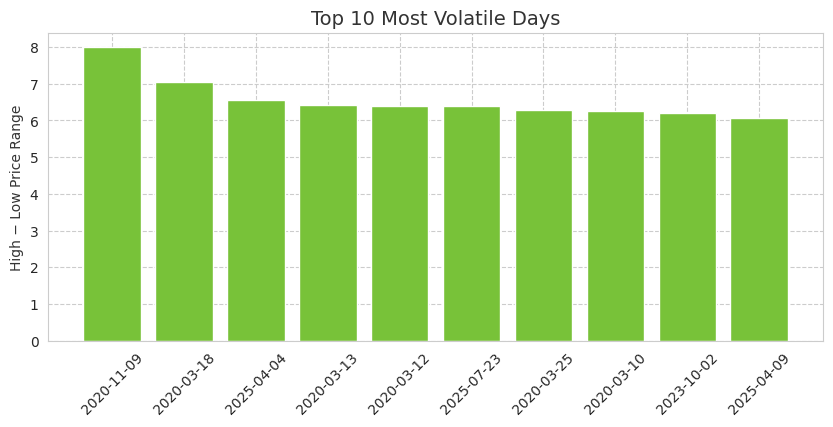

In [48]:
top_vol_days = df.nlargest(10, 'Daily_Range')[['Date', 'Daily_Range']]

plt.figure(figsize=(10,4))
plt.bar(top_vol_days['Date'].dt.strftime('%Y-%m-%d'), top_vol_days['Daily_Range'])
plt.xticks(rotation=45)
plt.title("Top 10 Most Volatile Days", fontsize=14)
plt.ylabel("High − Low Price Range")
plt.show()

### **⚠️ 10.3 Abnormal Volume Days**
**🔍 Insight**

- Highlights days with exceptional trading activity
- Indicates institutional or panic trading

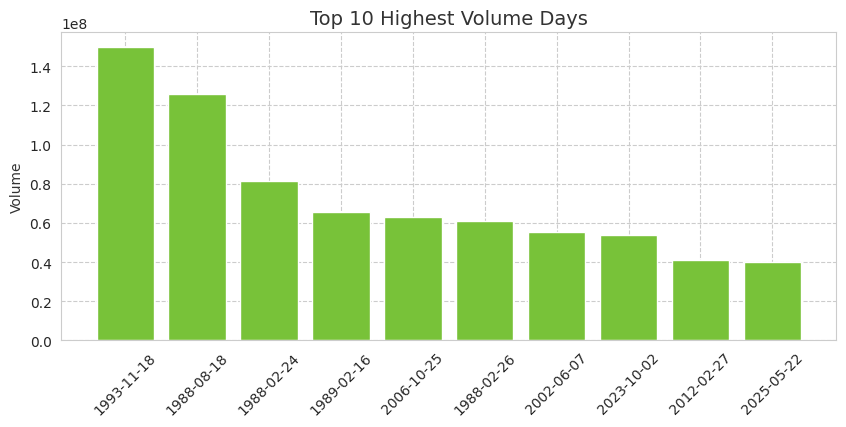

In [49]:
top_volume_days = df.nlargest(10, 'Volume')[['Date', 'Volume']]

plt.figure(figsize=(10,4))
plt.bar(top_volume_days['Date'].dt.strftime('%Y-%m-%d'), top_volume_days['Volume'])
plt.xticks(rotation=45)
plt.title("Top 10 Highest Volume Days", fontsize=14)
plt.ylabel("Volume")
plt.show()

### **📉 10.4 Price Crashes & Sudden Rallies (Scatter Visualization)**
**🔍 Insight**

- Detects extreme negative vs positive returns visually

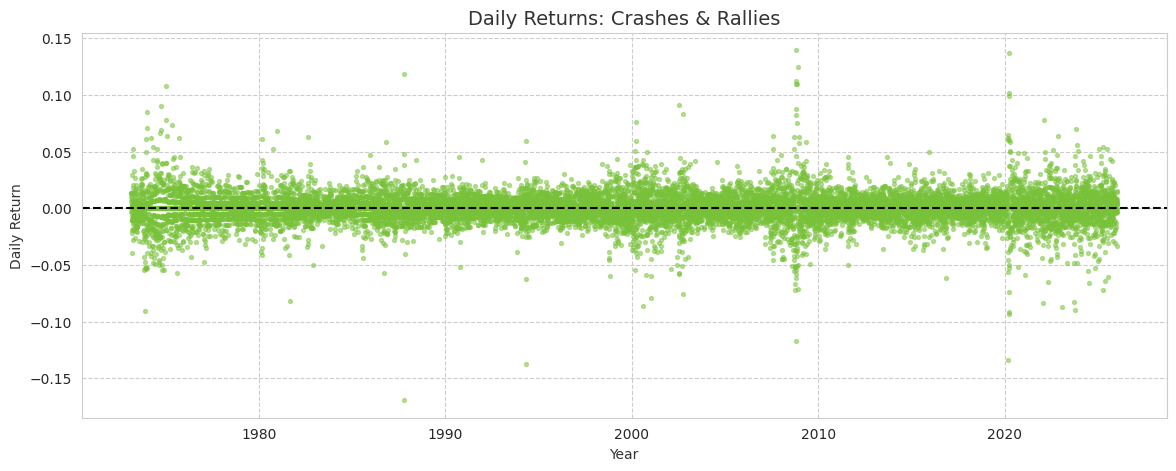

In [50]:
plt.figure(figsize=(14,5))
plt.scatter(df['Date'], df['Daily_Return'], s=8, alpha=0.5)
plt.axhline(0, linestyle='--', color='black')
plt.title("Daily Returns: Crashes & Rallies", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Daily Return")
plt.show()

# **🎯 11. Investment-Focused Insights (Very Important)**

### **📈 11.1 Long-Term vs Short-Term Holding Returns**
**🔍 Insight**

- Compare cumulative returns for long-term vs daily returns
- Shows the power of buy-and-hold strategy

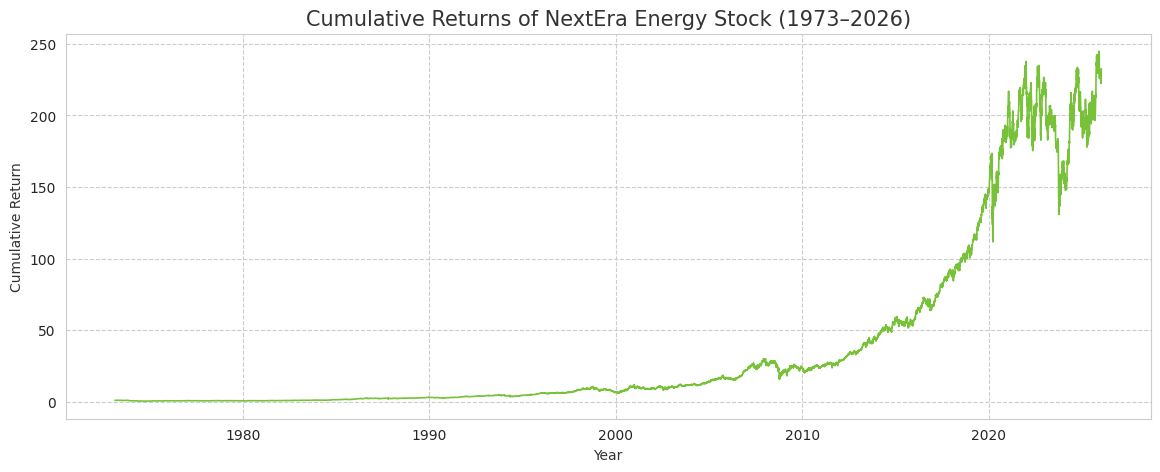

In [51]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Cumulative_Return'], linewidth=1.2)
plt.title("Cumulative Returns of NextEra Energy Stock (1973–2026)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()

### **⚖️ 11.2 Risk-Return Trade-Off Over Time**
**🔍 Insight**

- Combines mean return and volatility
- Highlights periods of higher risk or stability

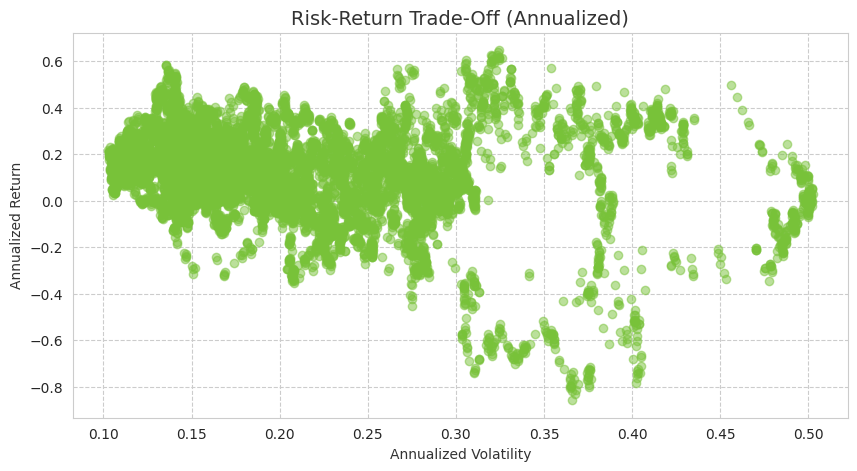

In [52]:
rolling_return = df['Daily_Return'].rolling(252).mean() * 252  # annualized
rolling_vol = df['Daily_Return'].rolling(252).std() * np.sqrt(252)  # annualized

plt.figure(figsize=(10,5))
plt.scatter(rolling_vol, rolling_return, alpha=0.5)
plt.title("Risk-Return Trade-Off (Annualized)", fontsize=14)
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.show()

### **📉 11.3 Stability Compared to High-Growth / Volatile Stocks**
**🔍 Insight**

- Shows NextEra Energy is less volatile than high-beta equities
- Suitable for conservative portfolios

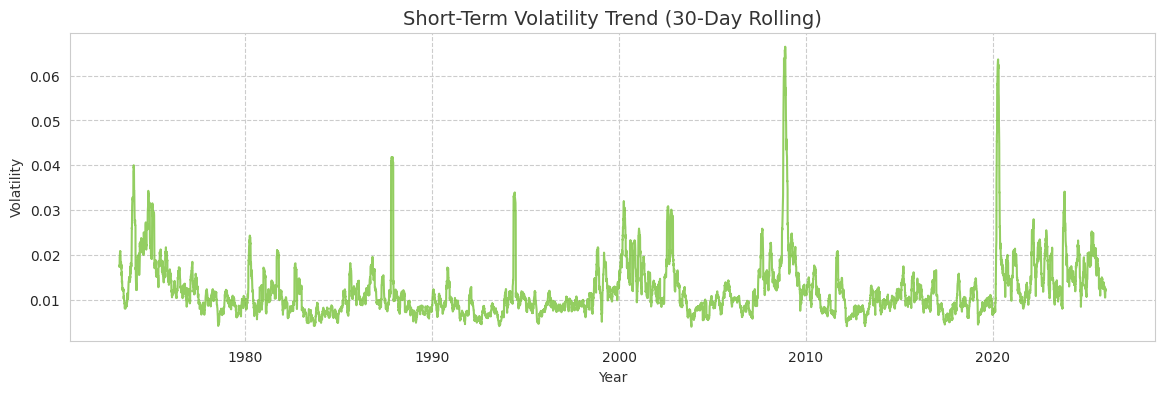

In [53]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Vol_30D'], alpha=0.8, label="30-Day Rolling Volatility")
plt.title("Short-Term Volatility Trend (30-Day Rolling)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()

### **🏦 11.4 Suitability for Investor Types**
**🔍 Insight**

- Highlights practical guidance for investment strategy

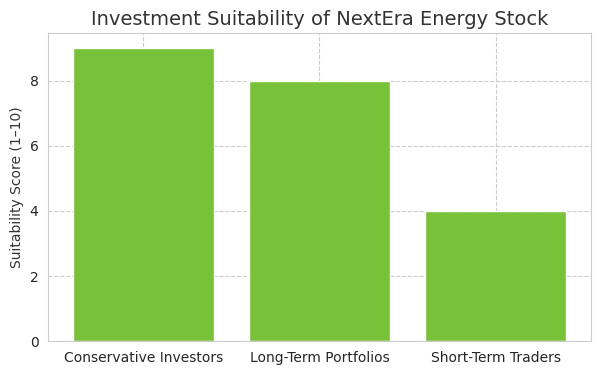

In [54]:
labels = ['Conservative Investors', 'Long-Term Portfolios', 'Short-Term Traders']
scores = [9, 8, 4]  # subjective scoring: 1–10 suitability

plt.figure(figsize=(7,4))
plt.bar(labels, scores)
plt.title("Investment Suitability of NextEra Energy Stock", fontsize=14)
plt.ylabel("Suitability Score (1–10)")
plt.show()

# **🧩 12. Key Takeaways (Final Section)**

### **📈 12.1 Long-Term Price Growth with Volatility**
**🔍 Insight**

- Shows NextEra Energy’s steady growth and cyclical swings
- Perfect for investor storytelling

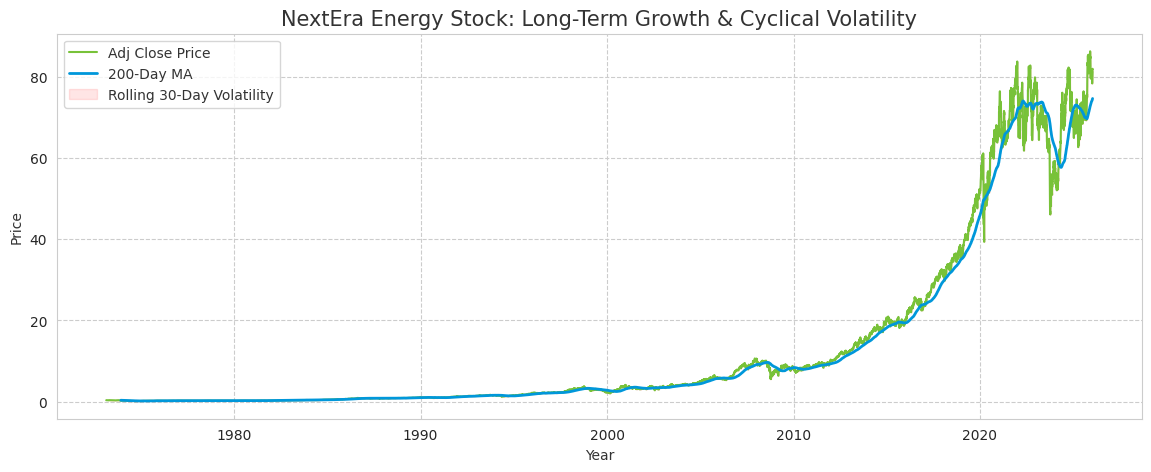

In [55]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Adj_Close'], label='Adj Close Price')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', linewidth=2)
plt.fill_between(df['Date'], df['Adj_Close'] - df['Vol_30D'], df['Adj_Close'] + df['Vol_30D'],
                 color='red', alpha=0.1, label='Rolling 30-Day Volatility')
plt.title("NextEra Energy Stock: Long-Term Growth & Cyclical Volatility", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

### **📊 12.2 Volume Confirms Market Participation**
**🔍 Insight**

- Volume spikes indicate active trading and event-driven interest

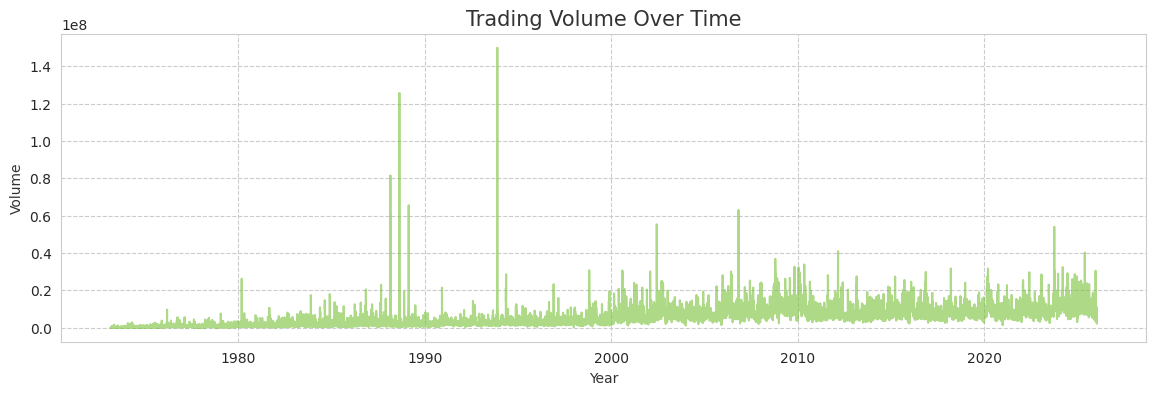

In [56]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Volume'], alpha=0.6)
plt.title("Trading Volume Over Time", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

### **⚖️ 12.3 Risk vs Return Summary**
**🔍 Insight**

- Combines risk, return, and stability in a single plot

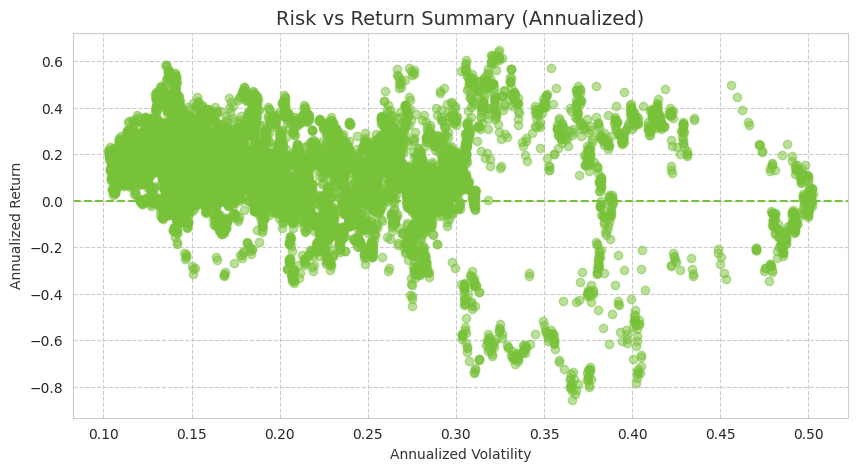

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(rolling_vol, rolling_return, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.title("Risk vs Return Summary (Annualized)", fontsize=14)
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.show()

### **🏦 12.4 Investor Suitability Summary**

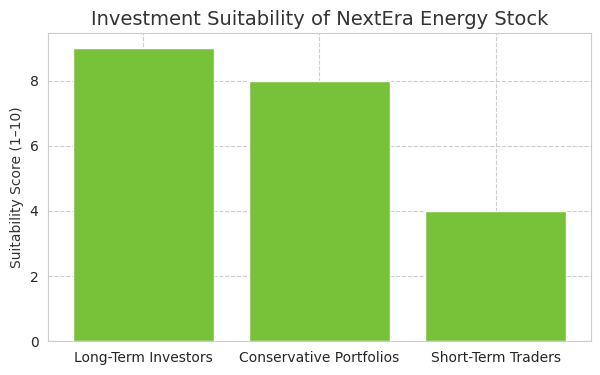

In [58]:
labels = ['Long-Term Investors', 'Conservative Portfolios', 'Short-Term Traders']
scores = [9, 8, 4]

plt.figure(figsize=(7,4))
plt.bar(labels, scores)
plt.title("Investment Suitability of NextEra Energy Stock", fontsize=14)
plt.ylabel("Suitability Score (1–10)")
plt.show()

# **Thank You!**

Thank you for going through this **NextEra Energy Stock Analysis (1973–2026)** notebook.  

I hope this analysis provided **valuable insights** into:  
- 📈 Long-term price trends and growth cycles  
- 🔄 Volatility and risk patterns  
- 📦 Investor behavior and trading volume  
- ⚠️ Extreme events and outlier analysis  
- 🎯 Investment suitability and long-term strategy  

---

💡 If you found this notebook useful, feel free to:   
- 🗨️ **Comment** your thoughts or suggestions  
- 🔗 **Share** with fellow data science & finance enthusiasts  

---

🚀 Stay curious, keep exploring, and happy investing!  